In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests


In [2]:
url = 'https://api.energidataservice.dk/datastore_search_sql?sql=SELECT "CentralProd", "ElectricBoilerCon", "ExchangeContinent", "ExchangeGreatBelt", "ExchangeNordicCountries", "GrossCon", "LocalPowerProd", "NetCon", "OnshoreWindPower", "SolarPowerProd", "HourDK", "PriceArea" from "electricitybalance"'

In [86]:
r = requests.get(url)

In [87]:
d = r.json()

In [5]:
#d

In [88]:
data = d['result']['records']

In [89]:
df = pd.DataFrame.from_dict(data)

In [90]:
df.set_index('HourDK', inplace=True)

In [91]:
df.index = pd.to_datetime(df.index)

In [92]:
df.sort_index(inplace=True)

In [93]:
df.head()

,CentralProd,ElectricBoilerCon,ExchangeContinent,ExchangeGreatBelt,ExchangeNordicCountries,GrossCon,LocalPowerProd,NetCon,OnshoreWindPower,PriceArea,SolarPowerProd
HourDK,,,,,,,,,,,
2011-01-01 00:00:00,980.6,NaN,-557.0,408.6,-379.2,1627.4,333.3,1568.0,636.818306,DK2,NaN
2011-01-01 00:00:00,1237.0,NaN,-477.5,-408.6,-1141.6,2204.6,450.7,2112.8,1926.581694,DK1,NaN
2011-01-01 01:00:00,1083.2,NaN,-434.3,-309.0,-1151.6,2129.5,436.4,2040.2,1883.371297,DK1,NaN
2011-01-01 01:00:00,978.3,NaN,-292.0,309.0,-542.8,1574.0,279.7,1516.9,633.028703,DK2,NaN
2011-01-01 02:00:00,936.7,NaN,-285.0,297.0,-518.8,1510.1,250.0,1455.0,615.424796,DK2,NaN


In [94]:
dk1 = df[df.PriceArea == 'DK1']
dk2 = df[df.PriceArea == 'DK2']

In [95]:
dk1.drop(['PriceArea'], axis=1, inplace=True)
dk2.drop(['PriceArea'], axis=1, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [96]:
for column in dk1.columns:
    dk1.rename(columns={column: f'{column}_dk1'}, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [97]:
for column in dk2.columns:
    dk2.rename(columns={column: f'{column}_dk2'}, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [98]:
data = pd.concat([dk1.resample('H').mean(), dk2.resample('H').mean()], axis=1)

In [99]:
data.drop(['ExchangeGreatBelt_dk2'], axis=1, inplace=True)

# Transforming non-gaussian data 

In [100]:
def log_transform(x):
    if x > 0:
        return np.log(x)
    elif x == 0: 
        return 0
    elif x < 0:
        raise Exception('Negative observation!')
    

In [101]:
data.fillna(method='bfill', inplace=True)

In [102]:
data.columns

Index(['CentralProd_dk1', 'ElectricBoilerCon_dk1', 'ExchangeContinent_dk1',
       'ExchangeGreatBelt_dk1', 'ExchangeNordicCountries_dk1', 'GrossCon_dk1',
       'LocalPowerProd_dk1', 'NetCon_dk1', 'OnshoreWindPower_dk1',
       'SolarPowerProd_dk1', 'CentralProd_dk2', 'ElectricBoilerCon_dk2',
       'ExchangeContinent_dk2', 'ExchangeNordicCountries_dk2', 'GrossCon_dk2',
       'LocalPowerProd_dk2', 'NetCon_dk2', 'OnshoreWindPower_dk2',
       'SolarPowerProd_dk2'],
      dtype='object')

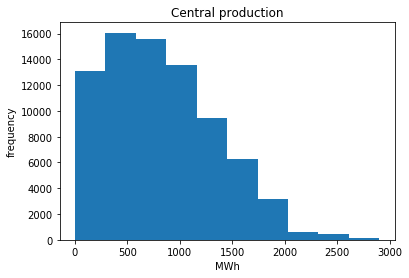

In [103]:
plt.hist(data.CentralProd_dk1) # fine
plt.title('Central production')
plt.xlabel('MWh')
plt.ylabel('frequency')
plt.show()

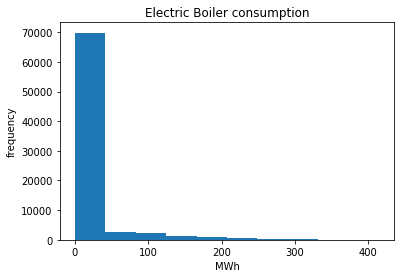

In [104]:
plt.hist(data.ElectricBoilerCon_dk1)
plt.title('Electric Boiler consumption')
plt.xlabel('MWh')
plt.ylabel('frequency')
plt.show()

In [108]:
#data.ElectricBoilerCon_dk1.fillna(method='ffill').hist() # log-transform
data.ElectricBoilerCon_dk1 = data.ElectricBoilerCon_dk1.apply(lambda x: log_transform(x))

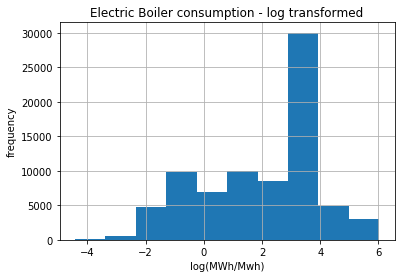

In [110]:
data.ElectricBoilerCon_dk1.hist()
plt.title('Electric Boiler consumption - log transformed')
plt.xlabel('log(MWh/Mwh)')
plt.ylabel('frequency')
plt.show()

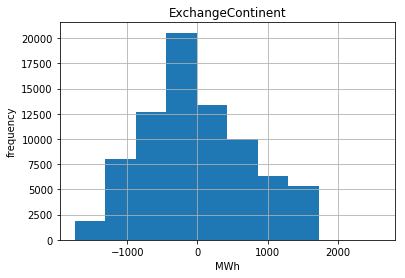

In [64]:
#plt.hist(data.ExchangeContinent_dk1) # fine
data.ExchangeContinent_dk1.hist()
plt.title('ExchangeContinent')
plt.xlabel('MWh')
plt.ylabel('frequency')
plt.show()

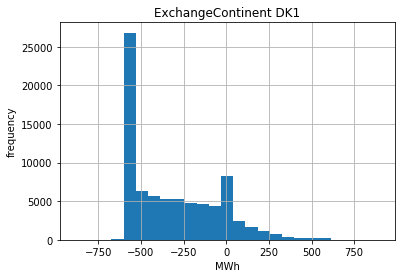

In [111]:
data.ExchangeGreatBelt_dk1.hist(bins=25)
plt.title('ExchangeContinent DK1')
plt.xlabel('MWh')
plt.ylabel('frequency')
plt.show()

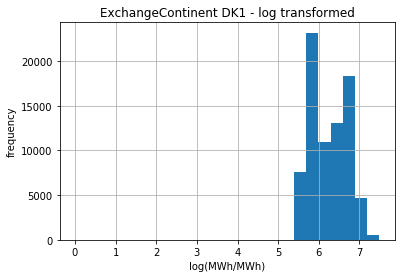

In [113]:
min_value = -data.ExchangeGreatBelt_dk1.min()
#data.ExchangeGreatBelt_dk1 = data.ExchangeGreatBelt_dk1.apply(lambda x: log_transform(min_value + x))
data.ExchangeGreatBelt_dk1.hist(bins=25)
plt.title('ExchangeContinent DK1 - log transformed')
plt.xlabel('log(MWh/MWh)')
plt.ylabel('frequency')
plt.show()

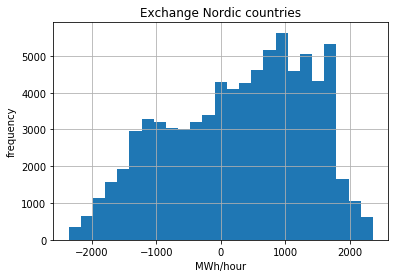

In [70]:
data.ExchangeNordicCountries_dk1.hist(bins=25) #fine
plt.title('Exchange Nordic countries')
plt.xlabel('MWh/hour')
plt.ylabel('frequency')
plt.show()

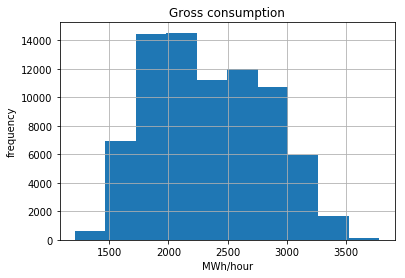

In [71]:
data.GrossCon_dk1.hist()
plt.title('Gross consumption')
plt.xlabel('MWh/hour')
plt.ylabel('frequency')
plt.show() # fine

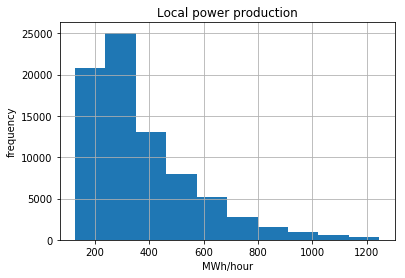

In [72]:
data.LocalPowerProd_dk1.hist()
plt.title('Local power production')
plt.xlabel('MWh/hour')
plt.ylabel('frequency')
plt.show() # fine

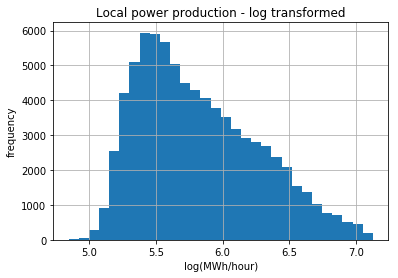

In [73]:
data.LocalPowerProd_dk1 = data.LocalPowerProd_dk1.apply(lambda x: log_transform(x))
data.LocalPowerProd_dk1.hist(bins=30)
plt.title('Local power production - log transformed')
plt.xlabel('log(MWh/hour)')
plt.ylabel('frequency')
plt.show()

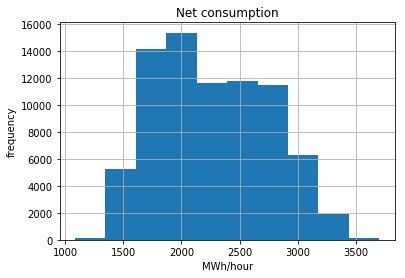

In [75]:
data.NetCon_dk1.hist()
plt.title('Net consumption')
plt.xlabel('MWh/hour')
plt.ylabel('frequency')# fine
plt.show()

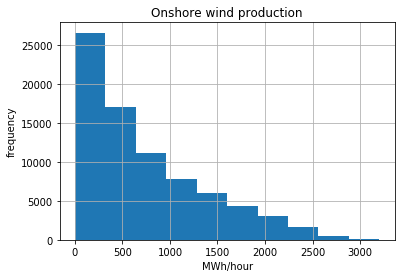

In [78]:
data.OnshoreWindPower_dk1.hist()
plt.title('Onshore wind production')
plt.xlabel('MWh/hour')
plt.ylabel('frequency')
plt.show()

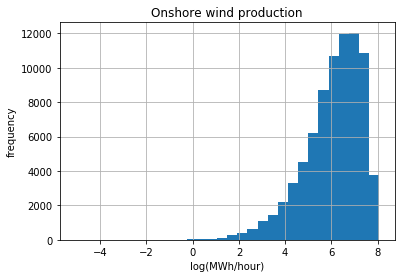

In [79]:
data.OnshoreWindPower_dk1 = data.OnshoreWindPower_dk1.apply(lambda x: log_transform(x))
data.OnshoreWindPower_dk1.hist(bins=30)
plt.title('Onshore wind production')
plt.xlabel('log(MWh/hour)')
plt.ylabel('frequency')
plt.show()

In [ ]:
data.SolarPowerProd_dk1.hist()
plt.title('Solar power production')
plt.xlabel('MWh/hour')
plt.ylabel('frequency')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

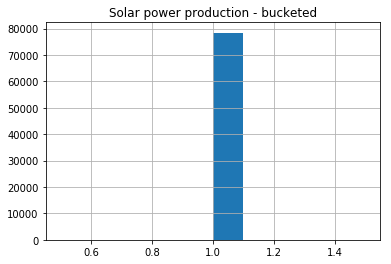

In [81]:
def bucketing(x):
    
    if x > 100:
        return 0
    else:
        return 1
    

data.SolarPowerProd_dk1 = data.SolarPowerProd_dk1.apply(lambda x: bucketing(x))
data.SolarPowerProd_dk1.hist()
plt.title('Solar power production - bucketed')
plt.label('0=less than 100 MWh/hour, 1=more than 100 MWh/hour')

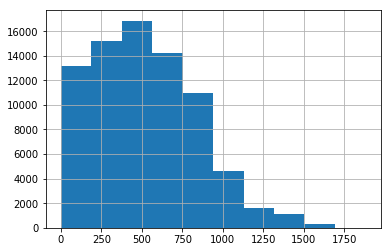

In [31]:
data.CentralProd_dk2.hist() # fine

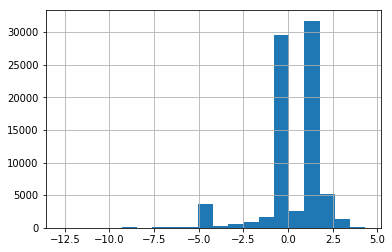

In [32]:
data.ElectricBoilerCon_dk2 = data.ElectricBoilerCon_dk2.apply(lambda x: log_transform(x))
data.ElectricBoilerCon_dk2.hist(bins=20)

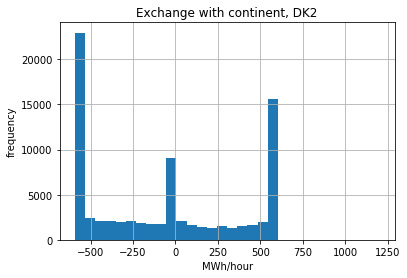

In [84]:
data.ExchangeContinent_dk2.hist(bins=30)
plt.title('Exchange with continent, DK2')
plt.xlabel('MWh/hour')
plt.ylabel('frequency')
plt.show()

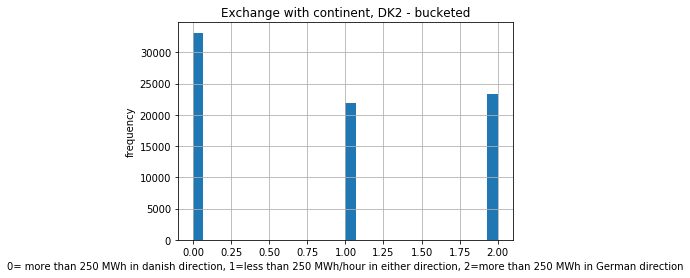

In [85]:
def bucketing2(x):
    if x < -250:
        return 0
    elif x > 250:
        return 2
    else:
        return 1

data.ExchangeContinent_dk2 = data.ExchangeContinent_dk2.apply(lambda x: bucketing2(x))
data.ExchangeContinent_dk2.hist(bins=30)
plt.title('Exchange with continent, DK2 - bucketed')
plt.xlabel('0= more than 250 MWh in danish direction, 1=less than 250 MWh/hour in either direction, 2=more than 250 MWh in German direction')
plt.ylabel('frequency')
plt.show()

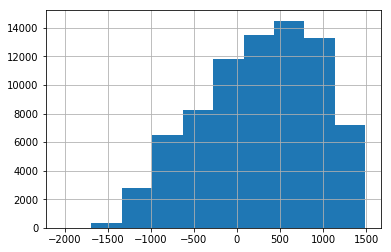

In [34]:
data.ExchangeNordicCountries_dk2.hist() # fine

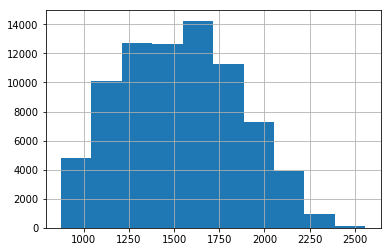

In [35]:
data.GrossCon_dk2.hist() # fine

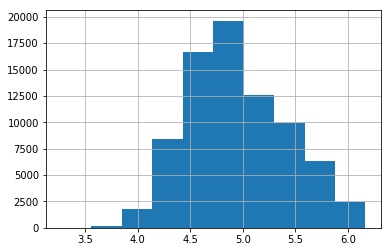

In [36]:
data.LocalPowerProd_dk2 = data.LocalPowerProd_dk2.apply(lambda x: log_transform(x))
data.LocalPowerProd_dk2.hist()

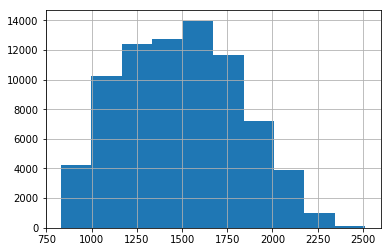

In [37]:
data.NetCon_dk2.hist() # fine

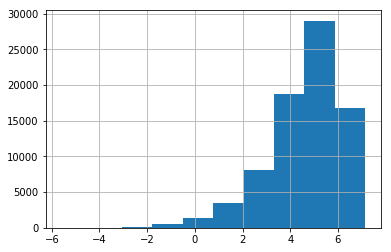

In [38]:
data.OnshoreWindPower_dk2 = data.OnshoreWindPower_dk2.apply(lambda x: log_transform(x))
data.OnshoreWindPower_dk2.hist()

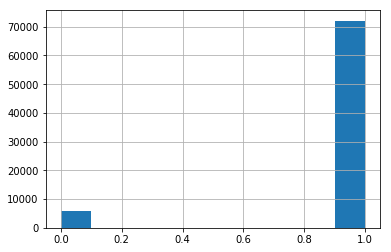

In [39]:
data.SolarPowerProd_dk2 = data.SolarPowerProd_dk2.apply(lambda x: bucketing(x))
data.SolarPowerProd_dk2.hist()

In [40]:
data.to_pickle('./data/electricitybalance.pkl')